## Bitcoin Never Again Indices


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import urllib
import requests
import riskfolio as rp
from datetime import datetime, timedelta
from copy import deepcopy

from highcharts import Highchart
from chart_builder import plot_chart, CHART_DEFAULTS
from IPython.display import display, HTML, display_html
import import_ipynb

# Chart libraries + settings
# plt.style.use('seaborn-whitegrid')
pd.options.mode.chained_assignment = None  # default='warn' - disable some pandas warnings
pd.options.display.float_format = '{:,.2f}'.format


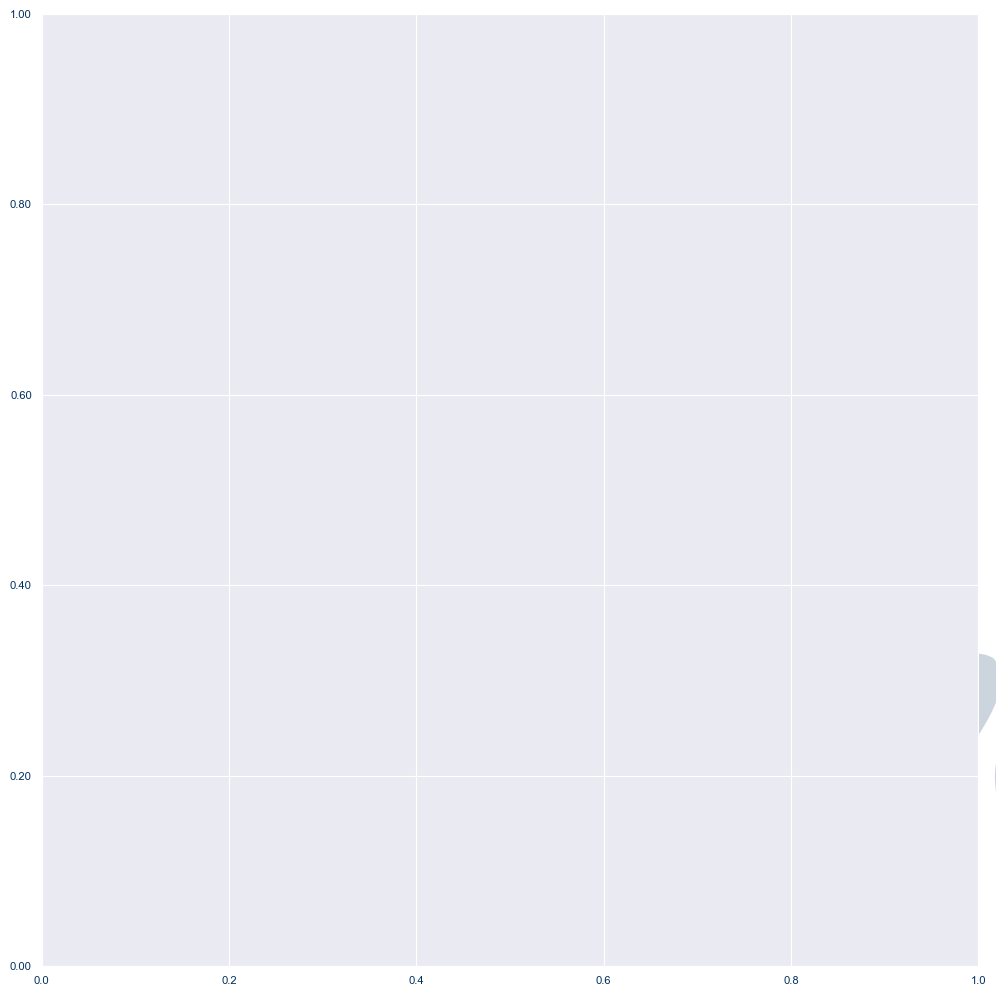

In [27]:
# MatPlotLib settings
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler
# Swan Colors
swan_colors = ['#31597F', '#7B96B0', '#C3D9E9', '#DAE1E8']
mpl.rcParams['lines.color'] = '#31597F'
mpl.rcParams['text.color'] = '#31597F'
mpl.rcParams['axes.prop_cycle'] = cycler(color=swan_colors)
mpl.rcParams['lines.linewidth'] = 1
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
sns.color_palette('pastel')
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=8)   
plt.rc('xtick', labelsize=8, color='#00305E')  
plt.rc('ytick', labelsize=8, color='#00305E')    
plt.rc('legend', fontsize=12)
plt.rc('font', size=8)          
plt.figure(figsize=(10, 10), tight_layout=True)

import matplotlib.ticker as ticker

# Define the formatter
formatter = ticker.StrMethodFormatter('{x:,.2f}')

# Use the formatter on the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

import matplotlib.image as mpimg

# Read in the image file
watermark = mpimg.imread('swan-logo-primary.png')

# Display the image as a background
plt.figimage(watermark, alpha=0.2, zorder=-1)

In [15]:
# Load Bitcoin Prices into a dataframe
# Ticker is customizable
ticker = "BTC"
# Cryptocompare URL and fiels
base_url = 'https://min-api.cryptocompare.com/data/histoday'
ticker_field = 'fsym'
field_dict = {'tsym': 'USD','allData': 'true'}
# Convert the field dict into a url encoded string
url_args = "&" + urllib.parse.urlencode(field_dict)
ticker = ticker.upper()
globalURL = (base_url + "?" + ticker_field + "=" + ticker + url_args)

In [16]:
# Request the data
resp = requests.get(url=globalURL)
data = resp.json()
data["Response"]

'Success'

In [17]:
# Parse the JSON into a Pandas DataFrame
try:
    df = pd.DataFrame.from_dict(data['Data'])
    df = df.rename(columns={'time': 'date'})
    df['date'] = pd.to_datetime(df['date'], unit='s')
    df.set_index('date', inplace=True)
    df_save = df[['close', 'open', 'high', 'low']]
except Exception as e:
    print(e)
    df_save = None

In [18]:
# Include percentage change 
df = df_save
df['change'] = df['close'].pct_change()

In [19]:
df = df.reset_index()
df

,date,close,open,high,low,change
0,2010-07-17,0.05,0.05,0.05,0.05,NaN
1,2010-07-18,0.09,0.05,0.09,0.06,0.73
2,2010-07-19,0.08,0.09,0.09,0.08,-0.06
3,2010-07-20,0.07,0.08,0.08,0.07,-0.07
4,2010-07-21,0.08,0.07,0.08,0.07,0.06
...,...,...,...,...,...,...
4628,2023-03-19,"28,037.32","26,973.38","28,448.08","26,902.00",0.04
4629,2023-03-20,"27,807.29","28,037.32","28,534.79","27,229.43",-0.01
4630,2023-03-21,"28,185.99","27,807.29","28,498.09","27,411.61",0.01
4631,2023-03-22,"27,317.37","28,185.99","28,877.16","26,681.65",-0.03


In [20]:
# initialize 'never_again' column with NaN values
df['never_again'] = pd.Series([None] * len(df))

# loop through each row in the dataframe
for i in range(len(df)):
    # initialize 'never_again' to 0
    never_again = 0
    # loop through the remaining rows
    for j in range(i+1, len(df)):
        # check if the close value is lower than the current row's close value
        if df['close'][j] < df['close'][i]:
            # increment never_again by 1
            never_again += 1
        else:
            # set the 'never_again' value for the current row and break the loop
            df.at[i, 'never_again'] = never_again
            break


In [21]:
df

,date,close,open,high,low,change,never_again
0,2010-07-17,0.05,0.05,0.05,0.05,NaN,0
1,2010-07-18,0.09,0.05,0.09,0.06,0.73,81
2,2010-07-19,0.08,0.09,0.09,0.08,-0.06,80
3,2010-07-20,0.07,0.08,0.08,0.07,-0.07,0
4,2010-07-21,0.08,0.07,0.08,0.07,0.06,78
...,...,...,...,...,...,...,...
4628,2023-03-19,"28,037.32","26,973.38","28,448.08","26,902.00",0.04,1
4629,2023-03-20,"27,807.29","28,037.32","28,534.79","27,229.43",-0.01,0
4630,2023-03-21,"28,185.99","27,807.29","28,498.09","27,411.61",0.01,None
4631,2023-03-22,"27,317.37","28,185.99","28,877.16","26,681.65",-0.03,0


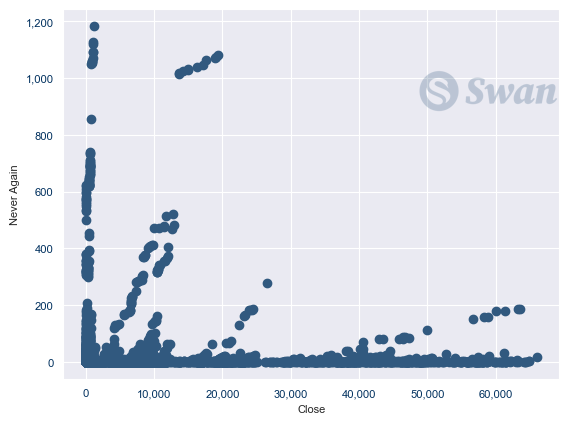

In [78]:
# create scatter plot
plt.scatter(df['close'], df['never_again'])

# set x-axis label
plt.xlabel('Close')

# set y-axis label
plt.ylabel('Never Again')

import matplotlib.ticker as ticker

# Define the formatter
formatter = ticker.StrMethodFormatter('{x:,.0f}')

# Use the formatter on the y-axis
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)

import matplotlib.image as mpimg
from PIL import Image

# Read in the image file
watermark = mpimg.imread('swan.png')

# Convert the pixel values to the range [0, 255]
watermark = (watermark * 255).astype('uint8')

# Set the size of the watermark
watermark_size = (int(350/2), int(120/2))
watermark_resized = Image.fromarray(watermark).resize(watermark_size)

# Center the watermark
figure_width, figure_height = plt.gcf().get_size_inches()
watermark_width, watermark_height = watermark_resized.size
xo = 400
yo = 300

# Display the image as a background
plt.figimage(watermark_resized, alpha=0.2, zorder=1,  xo=xo, yo=yo)

# show the plot
plt.show()

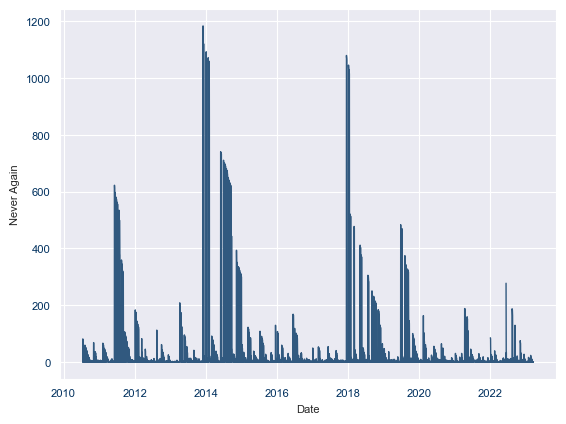

In [27]:
# create line plot
plt.plot(df['date'], df['never_again'])

# set x-axis label
plt.xlabel('Date')

# set y-axis label
plt.ylabel('Never Again')

# show the plot
plt.show()